# 🤨 Time-series needs the data in *some* format, too 

You know, Aayush we have been dealing with many ML algorithms and started things with: *StandardScaler, MinMaxScaler* etc, and when you grew up (as a DS student) you got to know more transformations like: *Log, Resiprocal, Square-root* etc.

Some of them were: ***box-cox, power, log***, remember? Those exactly are used frequently in this time-series setting.

—

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 

### `1.` **Power** Transformation
This means, we will take the power of **some** value for each values on the time-series. Here, we will **need** to understand the nature of the data first before applying any transformation.

Example:

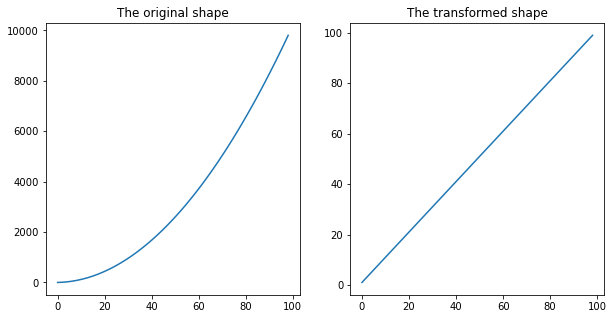

In [20]:
fig, axes = plt.subplots(1, 2,
                        figsize=(10, 5))

X = np.arange(1, 100) ** 2
axes[0].plot(X)
axes[0].set_title("The original shape");

X = X ** (1/2)
axes[1].plot(X)
axes[1].set_title("The transformed shape");

We have done this because **some model returns better results when the "form is linear"**. Thus, that time we want to transform them in to some linear form. And for that you need to understand the "nature" of the data.

### 

### `2.` **Log** Transformation
- This is the fundamental transformation of all. Really. <br>
> This can be used to "squash" the data in the smaller range.
- This can be the **default** transformation too!
- It has the frequent application in *finance*.

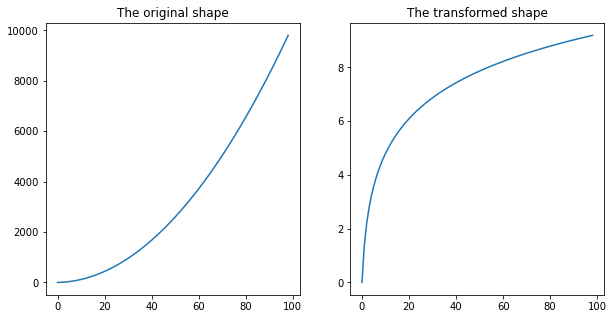

In [33]:
fig, axes = plt.subplots(1, 2,
                        figsize=(10, 5))

X = np.arange(1, 100) ** 2
axes[0].plot(X)
axes[0].set_title("The original shape");

X = np.log(X)
axes[1].plot(X)
axes[1].set_title("The transformed shape");

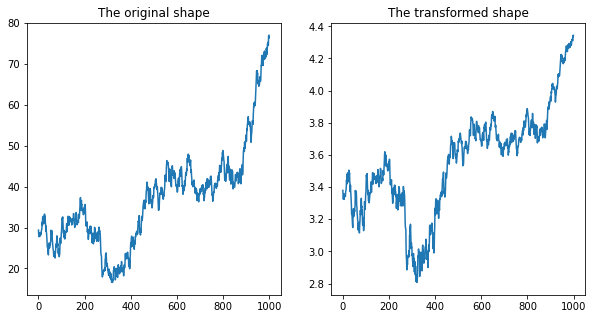

In [100]:
fig, axes = plt.subplots(1, 2,
                        figsize=(10, 5))

X = np.random.randn(1000)
X = np.cumsum(X)
X = X + 30 # added 30 to make all data positive
axes[0].plot(X)
axes[0].set_title("The original shape");

X = np.log(X)
axes[1].plot(X)
axes[1].set_title("The transformed shape");

This is how, log "shrinks" the number horizon.

# 

### `3.` **box-Cox** Transformation
This is the **generalization** of the "Power" and "Log" transforamtion.

It is used to achieve **"normality"** in the *non-normal* variables.

<img src="../images/Box cox.PNG">

So, here the box-cox transformation is applied on each single value but the values of lambda $\lambda$ is chosen by the algorithm. The general pseudo code goes like this:

    Get the lambda 𝜆 (-3, -2, -1, -0.5, 0, 0.5, 1, 2, 3):
    If 𝜆 == 0:
        X = log(X)
    else:
        X = (X^𝜆 - 1) / 𝜆
        
Thus, whole data will be transformed.

> ### But, **we don't** use Box-cox to transform our time-series → "normal" time series!

# 

# Transformation in ***Action***!

In [113]:
from scipy.stats import boxcox

In [114]:
df = pd.read_csv("../data/airline_passengers.csv")

In [116]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [128]:
plt.rcParams["figure.figsize"] = 10, 5

In [124]:
df.Month = pd.to_datetime(df["Month"], format="%Y-%m")
df = df.set_index(df["Month"])

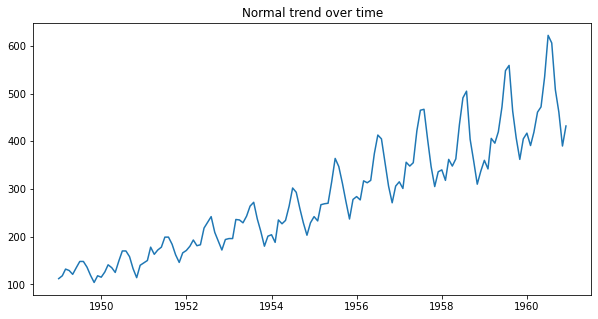

In [131]:
plt.plot(df["Passengers"])
plt.title("Normal trend over time");

- Here, we can see that the trend is **increaseing** and **too** the magnitude. 
- There is the **seasonality**: On each year of some specific months the amount rises and then dips
- The amount is increaing ie. the seasonality is same but the magnitude is increasing over time: *which the model has to consider*.

<img src="../images/normal-trend.PNG" height=200 width=600>

### Transformations

In [133]:
df["log"] = np.log(df.Passengers)
df["sqrt"] = np.sqrt(df.Passengers)
boxed, lambda_ = boxcox(df.Passengers)
df["boxcox"] = boxed

In [134]:
lambda_

0.14802265137037945

#### Log

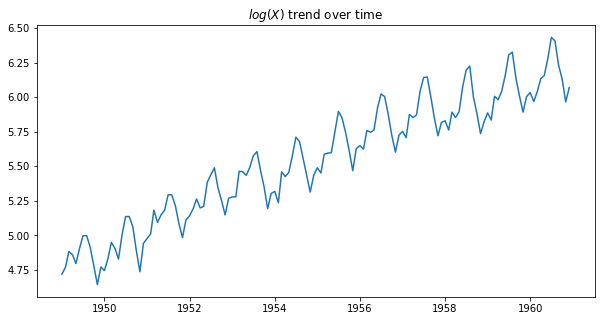

In [137]:
plt.plot(df["log"])
plt.title("$log(X)$ trend over time");

See? It is more **even on the both sides?** like, the magnitude is not changing much as it did in the normal data.

<img src="../images/log-trend.PNG" height=200 width=600>

#### Sqrt

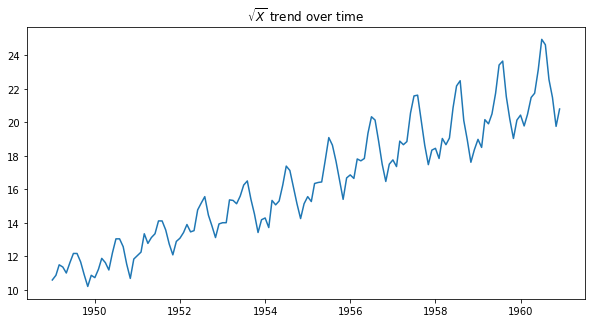

In [152]:
plt.plot(df["sqrt"])
plt.title("$\sqrt{X}$ trend over time");

It still has some increase in the magnitude but **not much as the original data**.

<img src="../images/sqrt-trend.PNG" height=200 width=600>

#### Box-cox

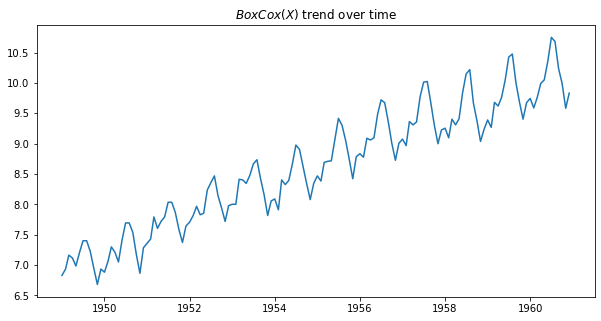

In [154]:
plt.plot(df["boxcox"])
plt.title("$BoxCox(X)$ trend over time");

It is similart to the log. So, here log and boxcox work similar (kind of)

#### 

### Confimation the Boxcox works in the `if 0 else` logic

Since the lambda is `~0.14` it will use the $\frac{X^\lambda - 1}{\lambda}$ formulae

In [159]:
# The calculated valuee
df["boxcox"].head()

Month
1949-01-01    6.827490
1949-02-01    6.932822
1949-03-01    7.161892
1949-04-01    7.114611
1949-05-01    6.983787
Name: boxcox, dtype: float64

In [160]:
# Manual values
(((df["Passengers"] ** lambda_) - 1) / lambda_).head()

Month
1949-01-01    6.827490
1949-02-01    6.932822
1949-03-01    7.161892
1949-04-01    7.114611
1949-05-01    6.983787
Name: Passengers, dtype: float64

Exactly the same!

## 

# Next up,
We will see the **forecasting metrics**!